[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Ware_et_al_2025/fig_1.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Ware_et_al_2025/fig_1.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Ware_et_al_2025/fig_1.ipynb)

# Fig. 1 in [Ware et al. 2025](https://doi.org/10.48550/arXiv.2509.05536)

In [ ]:
import os, sys
os.environ['NUMBA_THREADING_LAYER'] = 'workqueue'  # PySDM & PyMPDATA don't work with TBB; OpenMP has extra dependencies on macOS
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples', 'PySDM')

In [ ]:
import os
import numpy as np

from matplotlib import pyplot as plt
from PySDM_examples.Ware_et_al_2025.example import run,Settings,SpectrumPlotter
from PySDM.initialisation.sampling.spectral_sampling import ConstantMultiplicity
from PySDM.backends import CPU
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from cmcrameri import cm
from matplotlib.colors import LogNorm
from open_atmos_jupyter_utils import show_plot


/Users/emmaware/PySDM/PySDM/backends/numba.py:57: UserWarning: Disabling Numba threading due to ARM64 CPU (atomics do not work yet)
  warnings.warn(


dt=20, n_sd=12, exec_time=1.5802969580000008, it=0
dt=20, n_sd=12, exec_time=0.022234499999999713, it=1
dt=20, n_sd=13, exec_time=0.03680100000000053, it=0
dt=20, n_sd=13, exec_time=0.03676137500000021, it=1
dt=20, n_sd=14, exec_time=0.06822216700000006, it=0
dt=20, n_sd=14, exec_time=0.07112758400000008, it=1
dt=20, n_sd=15, exec_time=0.12911812500000064, it=0
dt=20, n_sd=15, exec_time=0.13137591600000054, it=1
dt=20, n_sd=16, exec_time=0.26035275, it=0
dt=20, n_sd=16, exec_time=0.25830895799999976, it=1
dt=20, n_sd=17, exec_time=0.520765709, it=0
dt=20, n_sd=17, exec_time=0.5674222919999998, it=1
dt=20, n_sd=18, exec_time=1.1589367079999988, it=0
dt=20, n_sd=18, exec_time=1.1554431669999996, it=1
dt=20, n_sd=19, exec_time=2.642052833000001, it=0
dt=20, n_sd=19, exec_time=2.6646142499999996, it=1
dt=10, n_sd=12, exec_time=0.03869029099999821, it=0
dt=10, n_sd=12, exec_time=0.038192875000000015, it=1
dt=10, n_sd=13, exec_time=0.06651275000000112, it=0
dt=10, n_sd=13, exec_time=0.066458

({(12,
   20): {0: array([4.15183574e-06, 5.69853961e-06, 7.37470271e-06, 9.70846156e-06,
          1.29306109e-05, 1.73377079e-05, 2.28193518e-05, 3.01143070e-05,
          3.97557980e-05, 5.24121468e-05, 6.89181116e-05, 9.03140820e-05,
          1.16713634e-04, 1.51724997e-04, 1.94893708e-04, 2.49594202e-04,
          3.16699929e-04, 4.01198502e-04, 4.96422429e-04, 6.14661967e-04,
          7.47362170e-04, 8.98570396e-04, 1.04992800e-03, 1.21537638e-03,
          1.36896520e-03, 1.49610922e-03, 1.58611515e-03, 1.61737587e-03,
          1.58449089e-03, 1.48891332e-03, 1.29253091e-03, 1.06759889e-03,
          8.23745481e-04, 5.72530724e-04, 3.59237235e-04, 1.91494497e-04,
          1.11376915e-04, 4.45636868e-05, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+

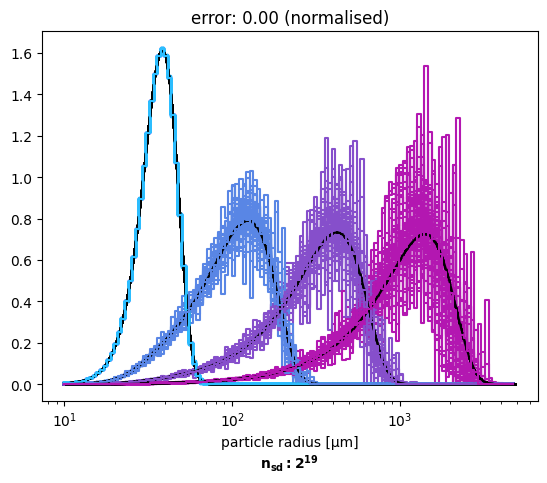

In [ ]:
backend = CPU()
n_sds = [12,13,14,15,16,17,18,19]
dts = [20,10,5,2,1]

regular = {}
meanoutputs = {}
n_iters = 2 if 'CI' in os.environ else 50
base_time = None
base_error = None

error_heatmap = [[0 for _ in range(len(n_sds))] for _ in range(len(dts))]
error_std_hm = [[0 for _ in range(len(n_sds))] for _ in range(len(dts))]
deficit_heatmap = [[0 for _ in range(len(n_sds))] for _ in range(len(dts))]
mean_time_heatmap = [[0 for _ in range(len(n_sds))] for _ in range(len(dts))]
sanity_heatmap = [[0 for _ in range(len(n_sds))] for _ in range(len(dts))]
plotter = SpectrumPlotter(Settings(), legend=False)
plotter.smooth = False


for i, dt in enumerate(dts):
    for j, n_sd in enumerate(n_sds):
        sanity_heatmap[i][j] = "dt="+str(dt)+", n_sd="+str(n_sd)
        outputs = []
        deficits = []
        errors = []

        for it in range(n_iters):
            settings = Settings()
            backend.formulae.seed = it

            settings.n_sd = 2**n_sd
            settings.dt = dt 
            settings.adaptive = False 
            settings.sampling = ConstantMultiplicity(settings.spectrum)

            states, exec_time, deficit = run(settings,backend)
            deficit *= settings.dv
            print(f"{dt=}, {n_sd=}, {exec_time=}, {it=}")

            outputs.append(states)
            deficits.append(deficit)

            for step, vals in states.items():
                error = plotter.plot(vals, step * settings.dt)
            errors.append(error*1e-3) #grams to kg

        mean_output = {}

        for key in outputs[0].keys():
            mean_output[key] = sum((output[key] for output in outputs)) / len(
                outputs
            )


        mean_deficit = sum(deficits) / len(deficits)
        last_step_error = sum(errors) / len(errors)
        error_std = np.std(errors)

        plotter.ylabel = (
            r"$\bf{dt: "
            + str(settings.dt)
            + ("+ adaptivity" if settings.adaptive else "")
            + "}$\ndm/dlnr [g/m^3/(unit dr/r)]"
            if j == 0
            else None
        )
        plotter.xlabel = (
            "particle radius [µm]\n" + r"$\bf{n_{sd}: 2^{" + str(n_sd) + "}}$"
            if i == len(dts) - 1
            else None
        )
        plotter.title = (
            f"error: {last_step_error:.2f} (normalised)"
        )
        error_heatmap[i][j] = last_step_error
        error_std_hm[i][j] = error_std
        deficit_heatmap[i][j] = mean_deficit
        plotter.finished = False
        plotter.finish()
        meanoutputs[(n_sd,dt)] = mean_output
regular["Error"] = error_heatmap
regular["Error_std"] = error_std_hm
regular["Deficit"] = deficit_heatmap
regular["MeanTime"] = mean_time_heatmap

plt.clf()
pass

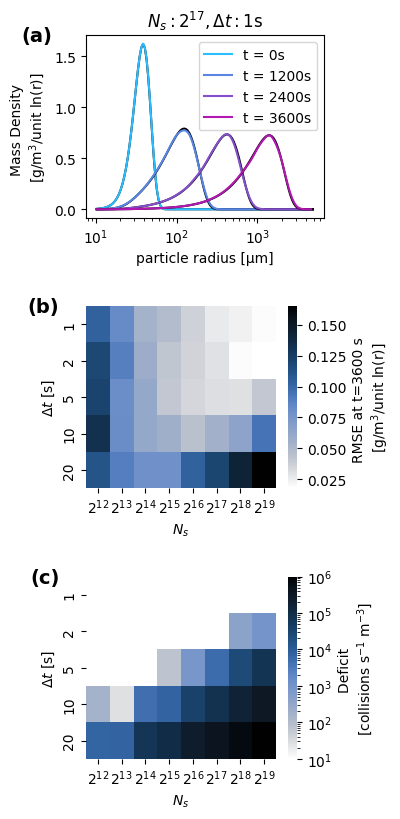

In [ ]:
formatter = ScalarFormatter(useMathText=True)
error_matrix = np.array(regular["Error"])
error_matrix*= 1e3  # Convert to g/m^3
error_matrix_flipped = np.flipud(error_matrix)
deficit_matrix = np.array(regular["Deficit"])

deficit_matrix_flipped = np.flipud(deficit_matrix)
deficit_matrix_flipped = deficit_matrix_flipped[:,:,0]
deficit_matrix_flipped[deficit_matrix_flipped == 0] = np.nan

fig, axes = plt.subplots(3, 1, figsize=(4, 8.3))


plotter = SpectrumPlotter(Settings(), legend=False)
plotter.smooth = True
plotter.ax = axes[0]
axes[0].set_title(f"$N_{{s}}: 2^{{17}},\Delta t:1$s")
for step, vals in meanoutputs[(17,1)].items():
    error = plotter.plot(vals, step * 1)


axes[0].set_xscale("log")
axes[0].set_ylabel("Mass Density \n[g/m$^3$/unit ln(r)]")
axes[0].set_xlabel(
                    "particle radius [µm]\n")
axes[0].legend()#loc='upper left', bbox_to_anchor=(1, 1))

runs = [12, 13, 14, 15, 16, 17, 18, 19]
dts = [20, 10, 5, 2, 1]
X, Y = np.meshgrid(np.arange(len(runs)), np.arange(len(dts)))

# Plot the deficit heatmap
sns.heatmap(error_matrix_flipped,
    ax=axes[1],cmap=cm.oslo_r,cbar=True,
    cbar_kws={"label": f"RMSE at t=3600 s \n[g/m$^3$/unit ln(r)]",
              },
)
axes[1].set_yticks(np.arange(len(dts)))
axes[1].set_yticklabels(dts)


axes[1].set_xlabel(f"$N_s$")
axes[1].set_ylabel("$\Delta t$ [s]")


sns.heatmap(deficit_matrix_flipped,
    ax=axes[2],cmap=cm.oslo_r,cbar=True,
    norm=LogNorm(vmin=10,vmax=1e6),
    cbar_kws={"label": f"Deficit \n[collisions s$^{{-1}}$ m$^{{-3}}$]",
              },
)
cbar = axes[2].collections[0].colorbar

axes[1].set_xticks(np.arange(len(runs)) + 0.5)
axes[1].set_yticks(np.arange(len(dts)) + 0.5)
axes[1].set_yticklabels(dts[::-1])  # Reverse the order of
axes[1].set_xticklabels([f"$2^{{{n}}}$" for n in runs])  # Format as 2^n_sd
axes[2].set_xticks(np.arange(len(runs)) + 0.5)
axes[2].set_xticklabels([f"$2^{{{n}}}$" for n in runs])  # Format as 2^n_sd

axes[2].set_yticks(np.arange(len(dts)) + 0.5)
axes[2].set_yticklabels(dts[::-1])  # Reverse the order of
axes[2]
# axes[2].set_title("Deficit")
axes[2].set_xlabel(f"$N_s$")
axes[2].set_ylabel("$\Delta t$ [s]")

for i, letter in enumerate(["a", "b", "c"]):
    axes[i].text(
        -0.14, 1.05, f"({letter})", transform=axes[i].transAxes,
        fontsize=14, fontweight="bold", va="top", ha="right"
    )



plt.tight_layout()
show_plot("fig_1")

